In [1]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Scott\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn[stats]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Scott\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Scott\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import seaborn as sns
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

In [5]:
# Load the Iris dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [8]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
class            3
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [11]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


We always feel compelled to use 'describe' but can we *really* tell anything about the data? No, not really. SHOW, not tell. For this data set, a boxplot would do much better at explainging the above.

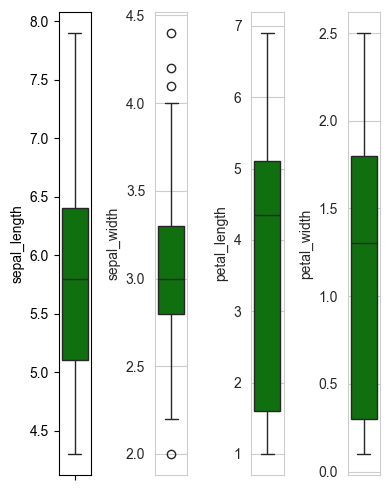

In [12]:
l = df.columns[:-1]  # Exclude the 'class' column if you don't want it in the box plot

# Set the number of columns and number of rows
number_of_columns = 4
number_of_rows = len(l) // number_of_columns + (1 if len(l) % number_of_columns != 0 else 0)

# Set up the plot size based on the number of columns and rows
plt.figure(figsize=(number_of_columns, 5 * number_of_rows))

# Create subplots for each feature
for i in range(len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=df, y=l[i], color='green', orient='v')
    plt.tight_layout()

plt.show()

In [13]:
profile = ProfileReport(df, title="Profiling Report")

In [14]:
#The modern way to do quick EDA on a dataset.
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile.to_file("IRIS_Profile.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# UNIVARIATE ANALYSIS

## Distribution Plots

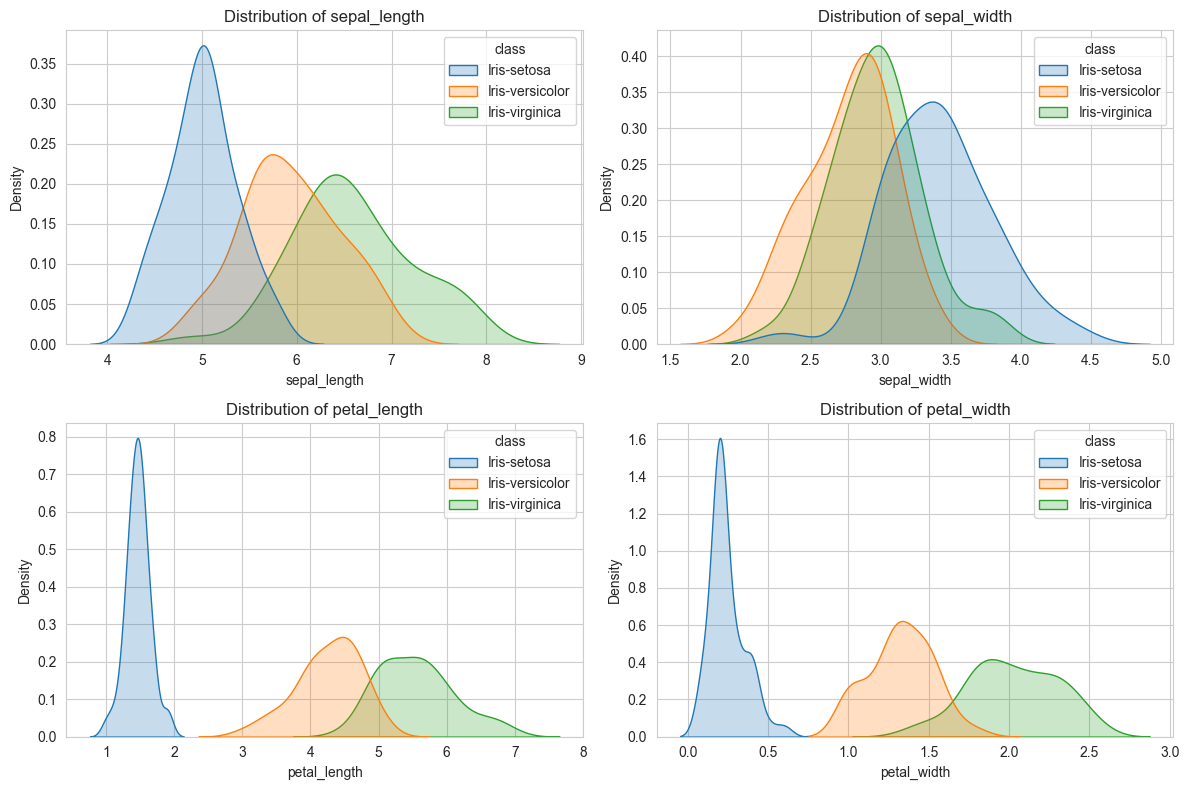

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Feature names
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Loop through features and create distribution plots
for i, ax in enumerate(axes):
    sns.kdeplot(data=df, x=features[i], hue="class", fill=True, ax=ax)
    ax.set_title(f"Distribution of {features[i]}")

plt.tight_layout()
plt.show()

The plot shows us that petal related features are better at distinguishing species.

## Box plot

## Skewness

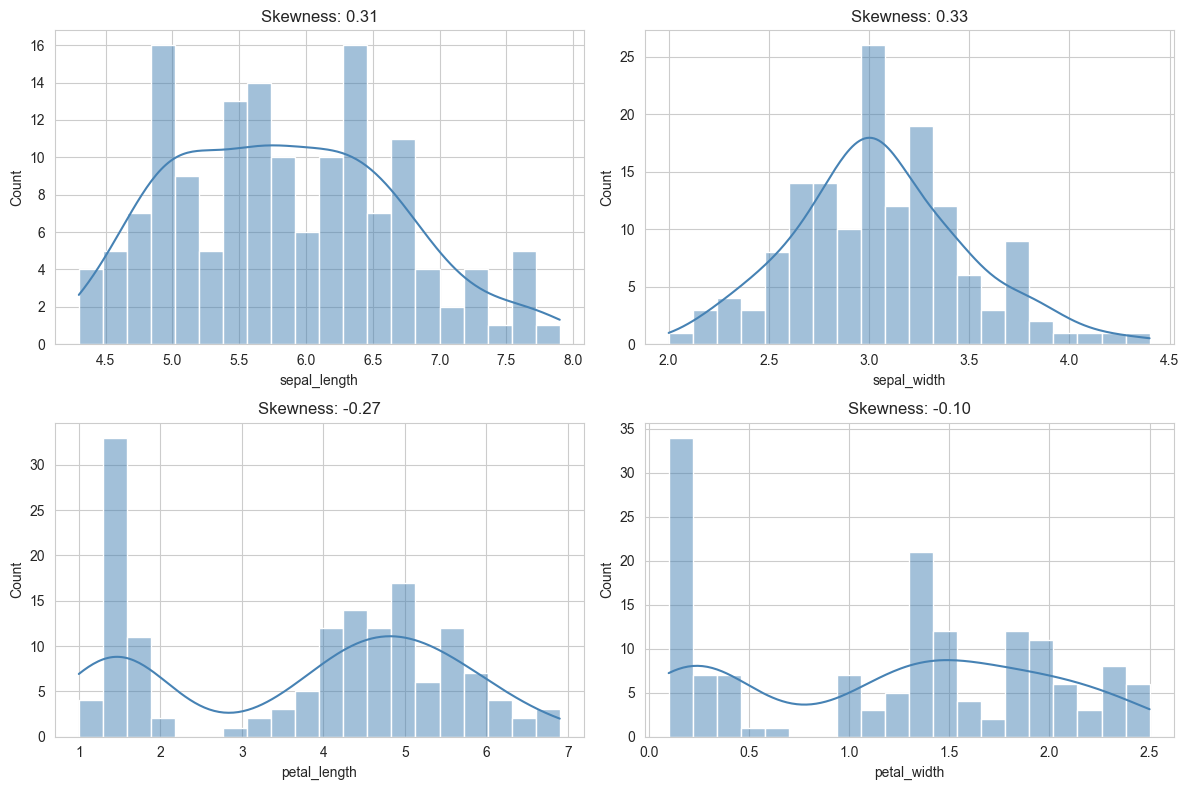

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, ax in enumerate(axes):
    sns.histplot(df[features[i]], kde=True, bins=20, ax=ax, color="steelblue")
    ax.set_title(f"Skewness: {skew(df[features[i]]):.2f}")

plt.tight_layout()
plt.show()

- Positive skew (>0) means a longer right tail.
- Negative skew (<0) means a longer left tail.
- Near zero means symmetric distribution.

In [18]:
df.groupby("class").apply(lambda x: x.drop(columns=["class"]).apply(skew))

C:\Users\Scott\AppData\Local\Temp\ipykernel_23368\1922083453.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("class").apply(lambda x: x.drop(columns=["class"]).apply(skew))


,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,0.116454,0.103814,0.069673,1.161022
Iris-versicolor,0.102190,-0.351867,-0.588159,-0.030236
Iris-virginica,0.114445,0.354878,0.532822,-0.125560


## Kurtosis

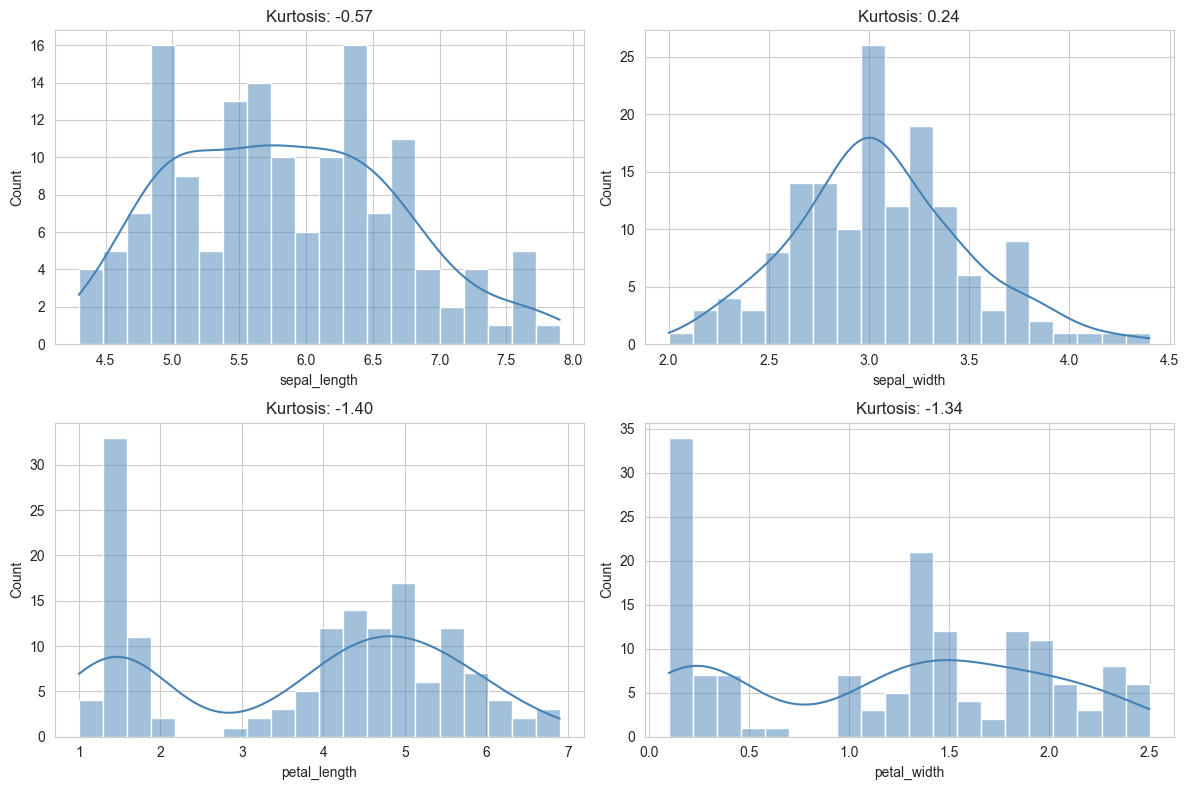

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for i, ax in enumerate(axes):
    sns.histplot(df[features[i]], kde=True, bins=20, ax=ax, color="steelblue")
    ax.set_title(f"Kurtosis: {kurtosis(df[features[i]]):.2f}")

plt.tight_layout()
plt.show()

- Higher peaks & long tails → High kurtosis
- Flatter & short tails → Low kurtosis
- The skewness and kurtosis values for sepal length and sepal width are within the range of -1.0 to 1.0, which indicates they are not highly skewed or heavy-tailed. This suggests that these features are fairly normally distributed, and no major transformations are needed.
- However, for petal length and petal width, the kurtosis values (-1.40 and -1.34) are below -1.0, which suggests these distributions are platykurtic (flatter than a normal distribution). While this doesn’t necessarily require modification, it could impact statistical tests that assume normality.

Having said all that. Since the Iris dataset is based on real-world measurements of flowers, the data reflects natural variation, and there's no need to "fix" it unless a specific analysis requires a normal distribution. The data is the data.

In [20]:
df.groupby("class").apply(lambda x: x.drop(columns=["class"]).apply(kurtosis))

C:\Users\Scott\AppData\Local\Temp\ipykernel_23368\2144542170.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("class").apply(lambda x: x.drop(columns=["class"]).apply(kurtosis))


,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,-0.345765,0.685134,0.813665,1.296475
Iris-versicolor,-0.598827,-0.448272,-0.074402,-0.487833
Iris-virginica,-0.087942,0.519766,-0.256472,-0.661348


## Box Plot

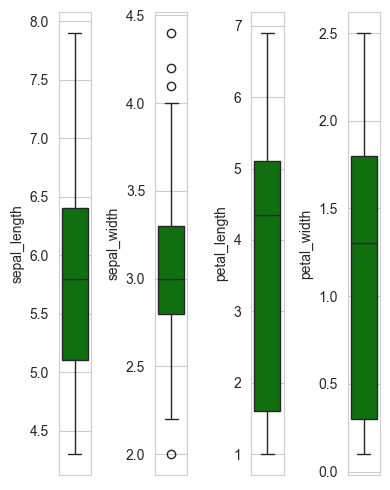

In [21]:
l = df.columns[:-1]  # Exclude the 'class' column if you don't want it in the box plot

# Set the number of columns and calculate number of rows
number_of_columns = 4
number_of_rows = len(l) // number_of_columns + (1 if len(l) % number_of_columns != 0 else 0)

# Set up the plot size based on the number of columns and rows
plt.figure(figsize=(number_of_columns, 5 * number_of_rows))

# Create subplots for each feature
for i in range(len(l)):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=df, y=l[i], color='green', orient='v')
    plt.tight_layout()

plt.show()

# MULTIVARIATE ANALYSIS

## Contour Plot

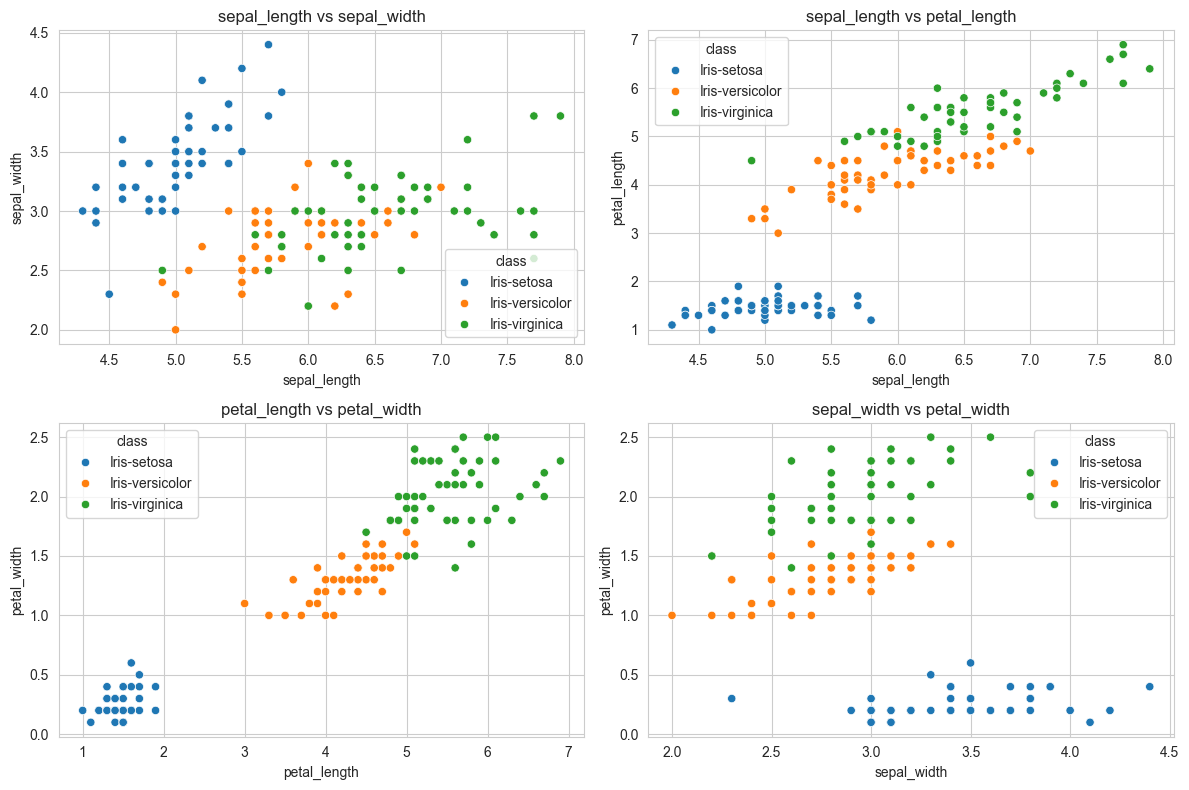

In [22]:
feature_pairs = [('sepal_length', 'sepal_width'),
                 ('sepal_length', 'petal_length'),
                 ('petal_length', 'petal_width'),
                 ('sepal_width', 'petal_width')]

# 2x2 scatter plot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.scatterplot(x=df[feature_pairs[i][0]], y=df[feature_pairs[i][1]], hue=df['class'], ax=ax)
    ax.set_title(f"{feature_pairs[i][0]} vs {feature_pairs[i][1]}")

plt.tight_layout()
plt.show()

## 3D Scatter Plot

A different (better?) representation of how data relates to one another vs. 2D plots.

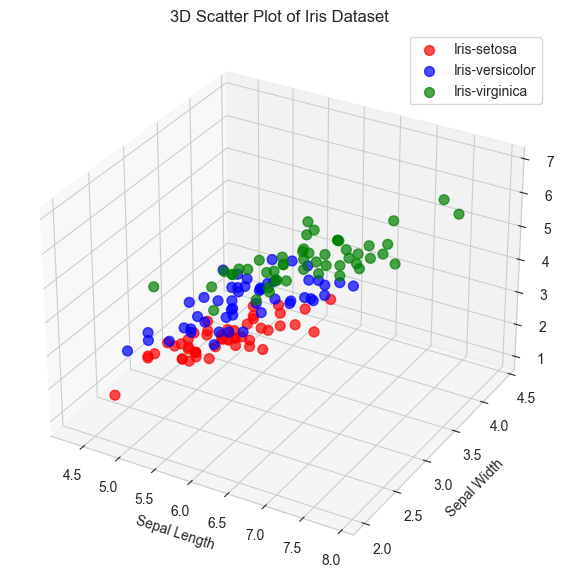

In [23]:
# Define colors for each class
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

# Create a 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
for species, color in colors.items():
    subset = df[df['class'] == species]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], subset['petal_length'], 
               label=species, color=color, alpha=0.7, s=50)

# Labels and Title
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.set_title("3D Scatter Plot of Iris Dataset")
ax.legend()

plt.show()

A still better (maybe even the best) representation of data relationships.

In [24]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

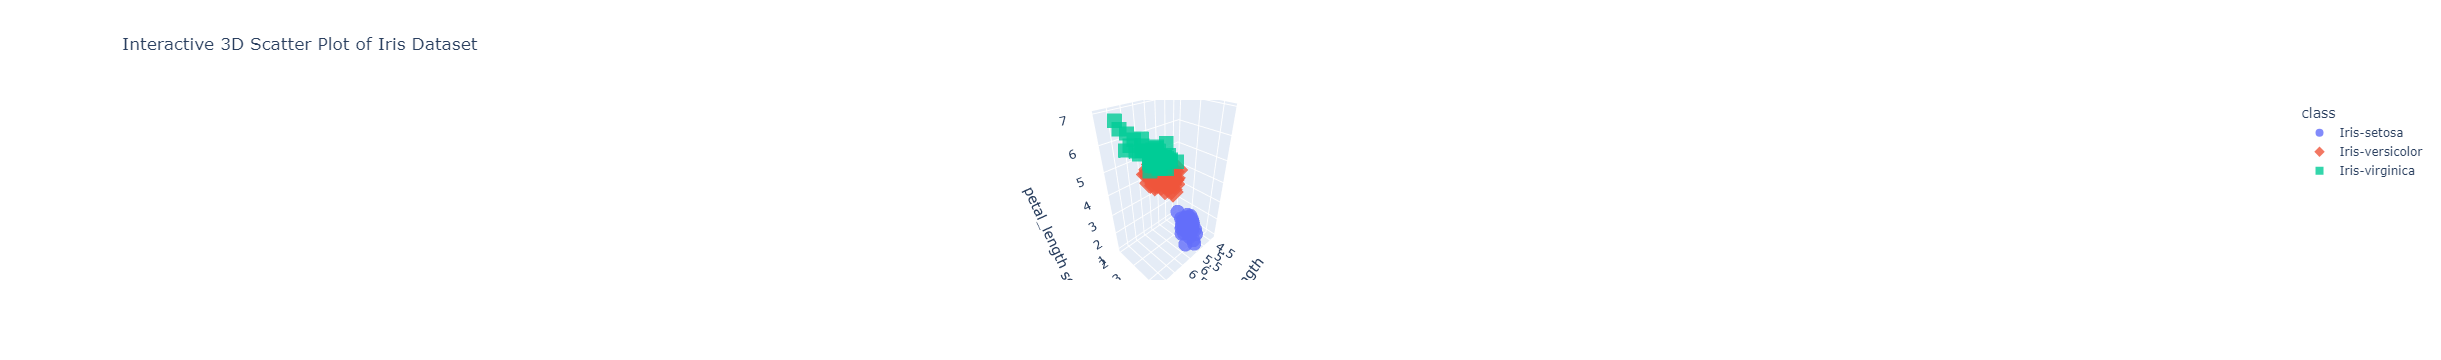

In [ ]:
#Interactive 3D scatter plot
fig = px.scatter_3d(df, 
                     x='sepal_length', 
                     y='sepal_width', 
                     z='petal_length', 
                     color='class',  # Color by class
                     symbol='class',  # Different symbols per class
                     opacity=0.8,
                     title="Interactive 3D Scatter Plot of Iris Dataset")

# Show the plot
fig.show()